In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

In [2]:
def readfiles(path):
    #path ="city_data/"    #指定需要读取文件的目录
    f = open("./filname.txt",'w') #先创建一个空的文本
    files =os.listdir(path) #采用listdir来读取所有文件
    files.sort() #排序
    s= []                   #创建一个空列表
    for file_ in files:     #循环读取每个文件名
        if not  os.path.isdir(path +file_):  #判断该文件是否是一个文件夹
            f_name = str(file_)
            s.append(f_name)  # 把当前文件名返加到列表里
            f.write(f_name + '\n') # 写入之前的文本中
    #if np.where(s =='.DS_Store')[0].shape[0]==0:
    s.remove('.DS_Store')
    #s.remove('.DS_Store')
    print(s) #看一下列表里的内容
    return s

In [3]:
s = readfiles("city_data/")
datalen = len(s)
bw_ratio = pd.DataFrame(columns=['bw_search','bw_arrest','bw_citation','bw_warning'])

for n in range(datalen):
    df = pd.read_csv('city_data/'+s[n],encoding = 'utf-8',delimiter = ",",error_bad_lines = False,low_memory=False)

    df_black_search = df.loc[(df['subject_race'] == 'black') & (df['search_conducted'] == True)]
    df_black_arrest = df.loc[(df['subject_race'] == 'black') & (df['arrest_made'] == True)]
    df_black_citation = df.loc[(df['subject_race'] == 'black') & (df['citation_issued'] == True)]
    df_black_warning = df.loc[(df['subject_race'] == 'black') & (df['warning_issued'] == True)]
    
    df_white_search = df.loc[(df['subject_race'] == 'white') & (df['search_conducted'] == True)]
    df_white_arrest = df.loc[(df['subject_race'] == 'white') & (df['arrest_made'] == True)]
    df_white_citation = df.loc[(df['subject_race'] == 'white') & (df['citation_issued'] == True)]
    df_white_warning = df.loc[(df['subject_race'] == 'white') & (df['warning_issued'] == True)]
    
    bw_ratio.loc[n] = [len(df_black_search)/len(df_white_search),
                    len(df_black_arrest)/len(df_white_arrest),
                    len(df_black_citation)/len(df_white_citation),
                    len(df_black_warning)/len(df_white_warning)]
    #print(n)
    
print(bw_ratio)

['ca_san_diego_2020_04_01.csv', 'ca_san_francisco_2020_04_01.csv', 'ca_stockton_2020_04_01.csv', 'ct_hartford_2020_04_01.csv', 'la_new_orleans_2020_04_01.csv', 'nc_charlotte_2020_04_01.csv', 'nc_durham_2020_04_01.csv', 'nc_fayetteville_2020_04_01.csv', 'nc_greensboro_2020_04_01.csv', 'nc_raleigh_2020_04_01.csv', 'nc_winston-salem_2020_04_01.csv', 'oh_columbus_2020_04_01.csv', 'pa_pittsburgh_2020_04_01.csv', 'tn_nashville_2020_04_01.csv', 'vt_burlington_2020_04_01.csv']
    bw_search  bw_arrest  bw_citation  bw_warning
0    0.858758   0.483907     0.214507    0.331162
1    2.017767   0.891688     0.314778    0.614485
2    3.172738   1.676768     0.922837    1.598085
3    1.194721   1.725610     0.859714    1.990160
4    3.787918   3.258673     2.341822    2.515497
5    3.261784   2.269759     1.232602    1.452618
6    4.367405   3.833067     1.696476    1.938354
7    3.011369   2.296623     1.664007    1.489672
8    2.320413   1.950303     1.056752    1.333772
9    2.172866   1.420026  

In [4]:
bw_ratio.describe()

,bw_search,bw_arrest,bw_citation,bw_warning
count,15.000000,15.000000,15.000000,15.000000
mean,2.116278,1.651394,0.957276,1.205424
std,1.199010,1.005246,0.598655,0.658396
min,0.335821,0.130000,0.121225,0.085131
25%,1.308114,0.990718,0.589332,0.723890
50%,2.017767,1.676768,0.922837,1.195433
75%,3.092054,2.110031,1.144677,1.543879
max,4.367405,3.833067,2.341822,2.515497


In [5]:
#s = ['ma_statewide_2020_04_01.csv']#readfiles("state_data/")
s= readfiles("state_data/") 
datalen = len(s)
years = ['2010','2012','2014']

bw_ratio = pd.DataFrame(columns=['State','bw_search','bw_arrest','bw_citation','bw_warning'])

for n in range(datalen):
    df = pd.read_csv('state_data/'+s[n],encoding = 'utf-8',delimiter = ",",error_bad_lines = False,low_memory=False)
    for m in range(len(years)):
        df_black_search = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'black') & (df['search_conducted'] == True)]
        df_black_arrest = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'black') & (df['arrest_made'] == True)]
        df_black_citation = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'black') & (df['citation_issued'] == True)]
        df_black_warning = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'black') & (df['warning_issued'] == True)]
    
        df_white_search = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'white') & (df['search_conducted'] == True)]
        df_white_arrest = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'white') & (df['arrest_made'] == True)]
        df_white_citation = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'white') & (df['citation_issued'] == True)]
        df_white_warning = df.loc[(df['date'] >= years[m]+'-01-01') & (df['date'] <= years[m]+'-12-31')
                          & (df['subject_race'] == 'white') & (df['warning_issued'] == True)]
    
        bw_ratio.loc[3*n+m] = [s[n],100*len(df_black_search)/len(df_white_search),                    
                                 100*len(df_black_arrest)/len(df_white_arrest),
                                 100*len(df_black_citation)/len(df_white_citation),                               
                                 100*len(df_black_warning)/len(df_white_warning)]
        #print(n,m)
        
bw_ratio.to_csv('data/bw_ratio_states.csv', encoding='utf-8')
print(bw_ratio)

['az_statewide_2020_04_01.csv', 'ma_statewide_2020_04_01.csv', 'mt_statewide_2020_04_01.csv', 'nc_statewide_2020_04_01.csv', 'ri_statewide_2020_04_01.csv', 'vt_statewide_2020_04_01.csv', 'wi_statewide_2020_04_01.csv']
                          State   bw_search  bw_arrest  bw_citation  \
0   az_statewide_2020_04_01.csv   14.814815  23.893805     9.068168   
1   az_statewide_2020_04_01.csv   19.691042  17.242063     9.541003   
2   az_statewide_2020_04_01.csv   22.609710  19.722159    11.162794   
3   ma_statewide_2020_04_01.csv   24.399126  20.310148    13.849207   
4   ma_statewide_2020_04_01.csv   28.468208  21.703488    15.347306   
5   ma_statewide_2020_04_01.csv   27.813713  22.566000    15.586103   
6   mt_statewide_2020_04_01.csv    2.930403   0.883913     1.001192   
7   mt_statewide_2020_04_01.csv    3.883495   0.857449     1.194493   
8   mt_statewide_2020_04_01.csv    5.219780   1.651917     1.444810   
9   nc_statewide_2020_04_01.csv  110.558102  78.812020    51.059676   
1

In [6]:
bw_ratio.describe()

,bw_search,bw_arrest,bw_citation,bw_warning
count,21.000000,21.000000,21.000000,21.000000
mean,36.070758,28.510643,15.850969,15.995808
std,37.200433,27.526395,16.688799,20.514359
min,2.930403,0.857449,1.001192,0.734788
25%,12.741935,4.085258,2.823669,2.227521
50%,24.399126,21.703488,9.873965,7.383704
75%,38.119835,35.533553,20.086981,13.827198
max,125.599486,89.339297,54.630455,66.882333


In [7]:
df_political_power = pd.read_csv('data/political_power.csv',encoding = 'utf-8',delimiter = ",") 
#print(df_political_power)
statesname =['ARIZONA','MASSACHUSETTS','MONTANA',
             'NORTH CAROLINA','RHODE ISLAND','VERMONT','WEST VIRGINIA']
years = [2010,2012,2014]
col1 = ['Year','State','Political Power']
b_pol_power = pd.DataFrame(columns = col1)

for n in range(len(statesname)):
    for m in range(len(years)):
        pp = df_political_power[col1].loc[(df_political_power['State'] == statesname[n])
                                                            & (df_political_power['Race'] == 'Black')
                                                            & (df_political_power['Year'] == years[m])]
        b_pol_power = b_pol_power.append(pp,ignore_index=True) 

print(b_pol_power)

    Year           State  Political Power
0   2010         ARIZONA        -0.196633
1   2012         ARIZONA        -0.381291
2   2014         ARIZONA        -0.374581
3   2010   MASSACHUSETTS        -0.388122
4   2012   MASSACHUSETTS        -0.648779
5   2014   MASSACHUSETTS        -0.526637
6   2010         MONTANA        -1.391201
7   2012         MONTANA        -0.496973
8   2014         MONTANA        -1.958948
9   2010  NORTH CAROLINA        -0.913438
10  2012  NORTH CAROLINA        -1.040439
11  2014  NORTH CAROLINA        -0.908863
12  2010    RHODE ISLAND        -1.176219
13  2012    RHODE ISLAND        -0.960513
14  2014    RHODE ISLAND        -0.653087
15  2010         VERMONT        -1.916329
16  2012         VERMONT        -2.077903
17  2014         VERMONT        -1.681825
18  2010   WEST VIRGINIA        -1.262437
19  2012   WEST VIRGINIA        -1.439956
20  2014   WEST VIRGINIA        -1.173213


In [8]:
def plot_ci_manual(x,y,mycolor):
    """Return an axes of scatter data, fitting line, and confidence bands
    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    """
    
    # Computations-----------------------------------------------------------------
    def equation(a, b):
        """Return a 1D polynomial."""
        return np.polyval(a, b) 

    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from 1-D polynom fitting.
    
    y_model = equation(p, x)                                   # model using the fit parameters

    # Statistics
    n = y.size                                                 # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(0.9, n - m)                                # used for CI bands

    # Estimates of Error in Data and Model
    resid = y - y_model                           
    chi2 = np.sum((resid / y_model)**2)                        # chi-squared: estimates error in data
    chi2_red = chi2 / dof                                      # reduced chi-squared: measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

    # Plotting --------------------------------------------------------------------   
    # Fit
    x2 = np.linspace(np.min(x)-0.5, np.max(x)+0.5, 100)        # To draw extra area of fitting line, Extend data range
    y2 = equation(p, x2)
    plt.plot(x2, y2, "--", color=mycolor, linewidth=1.5, alpha=0.5, label="Fit")  

    # Confidence Interval
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    plt.fill_between(x2, y2 + ci, y2 - ci, color="darkgray", edgecolor=None,alpha=0.5)
    return

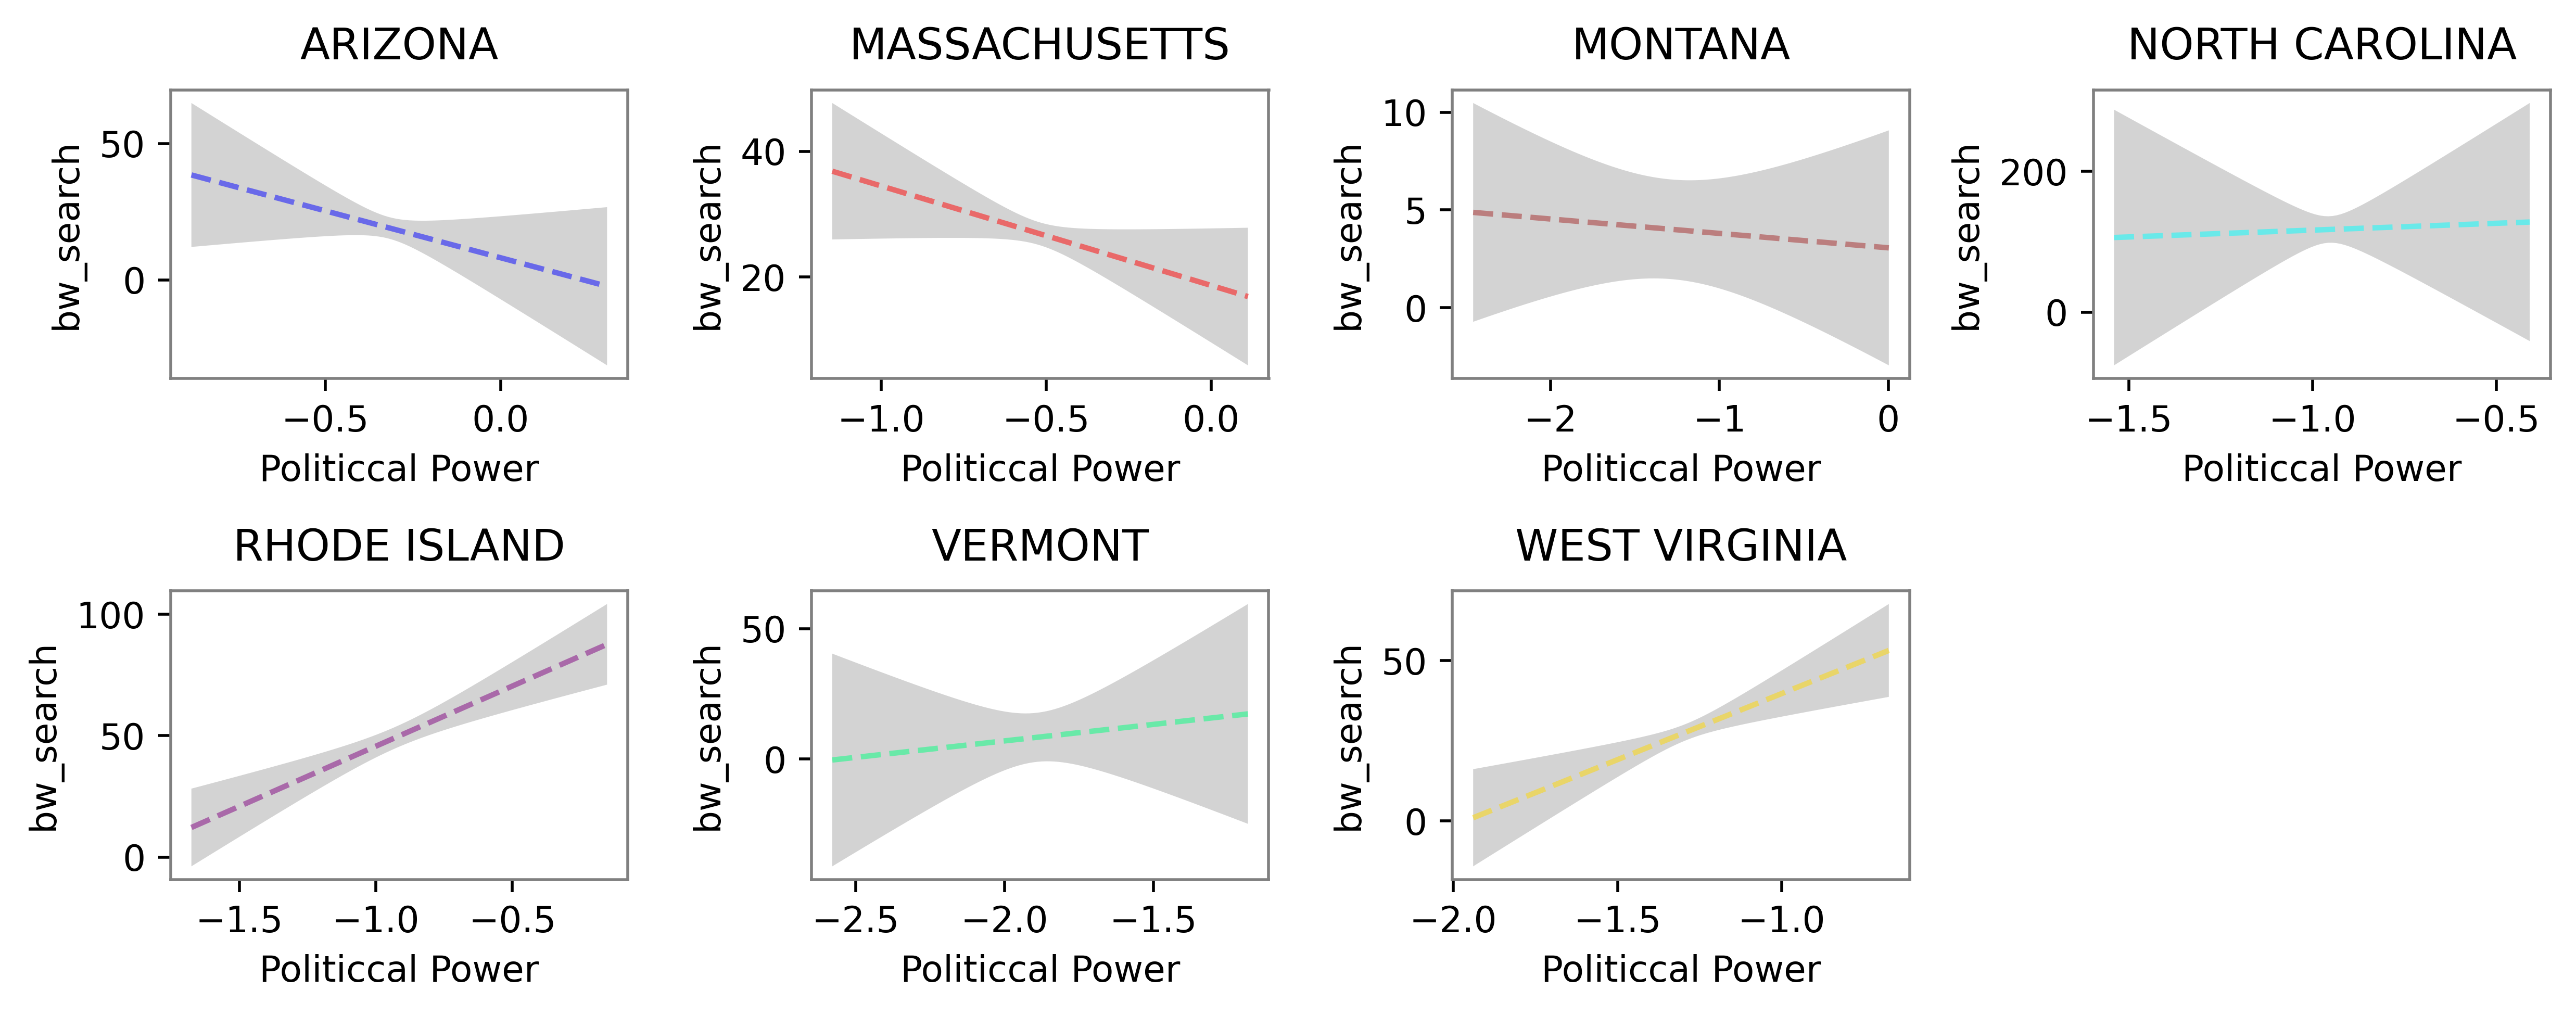

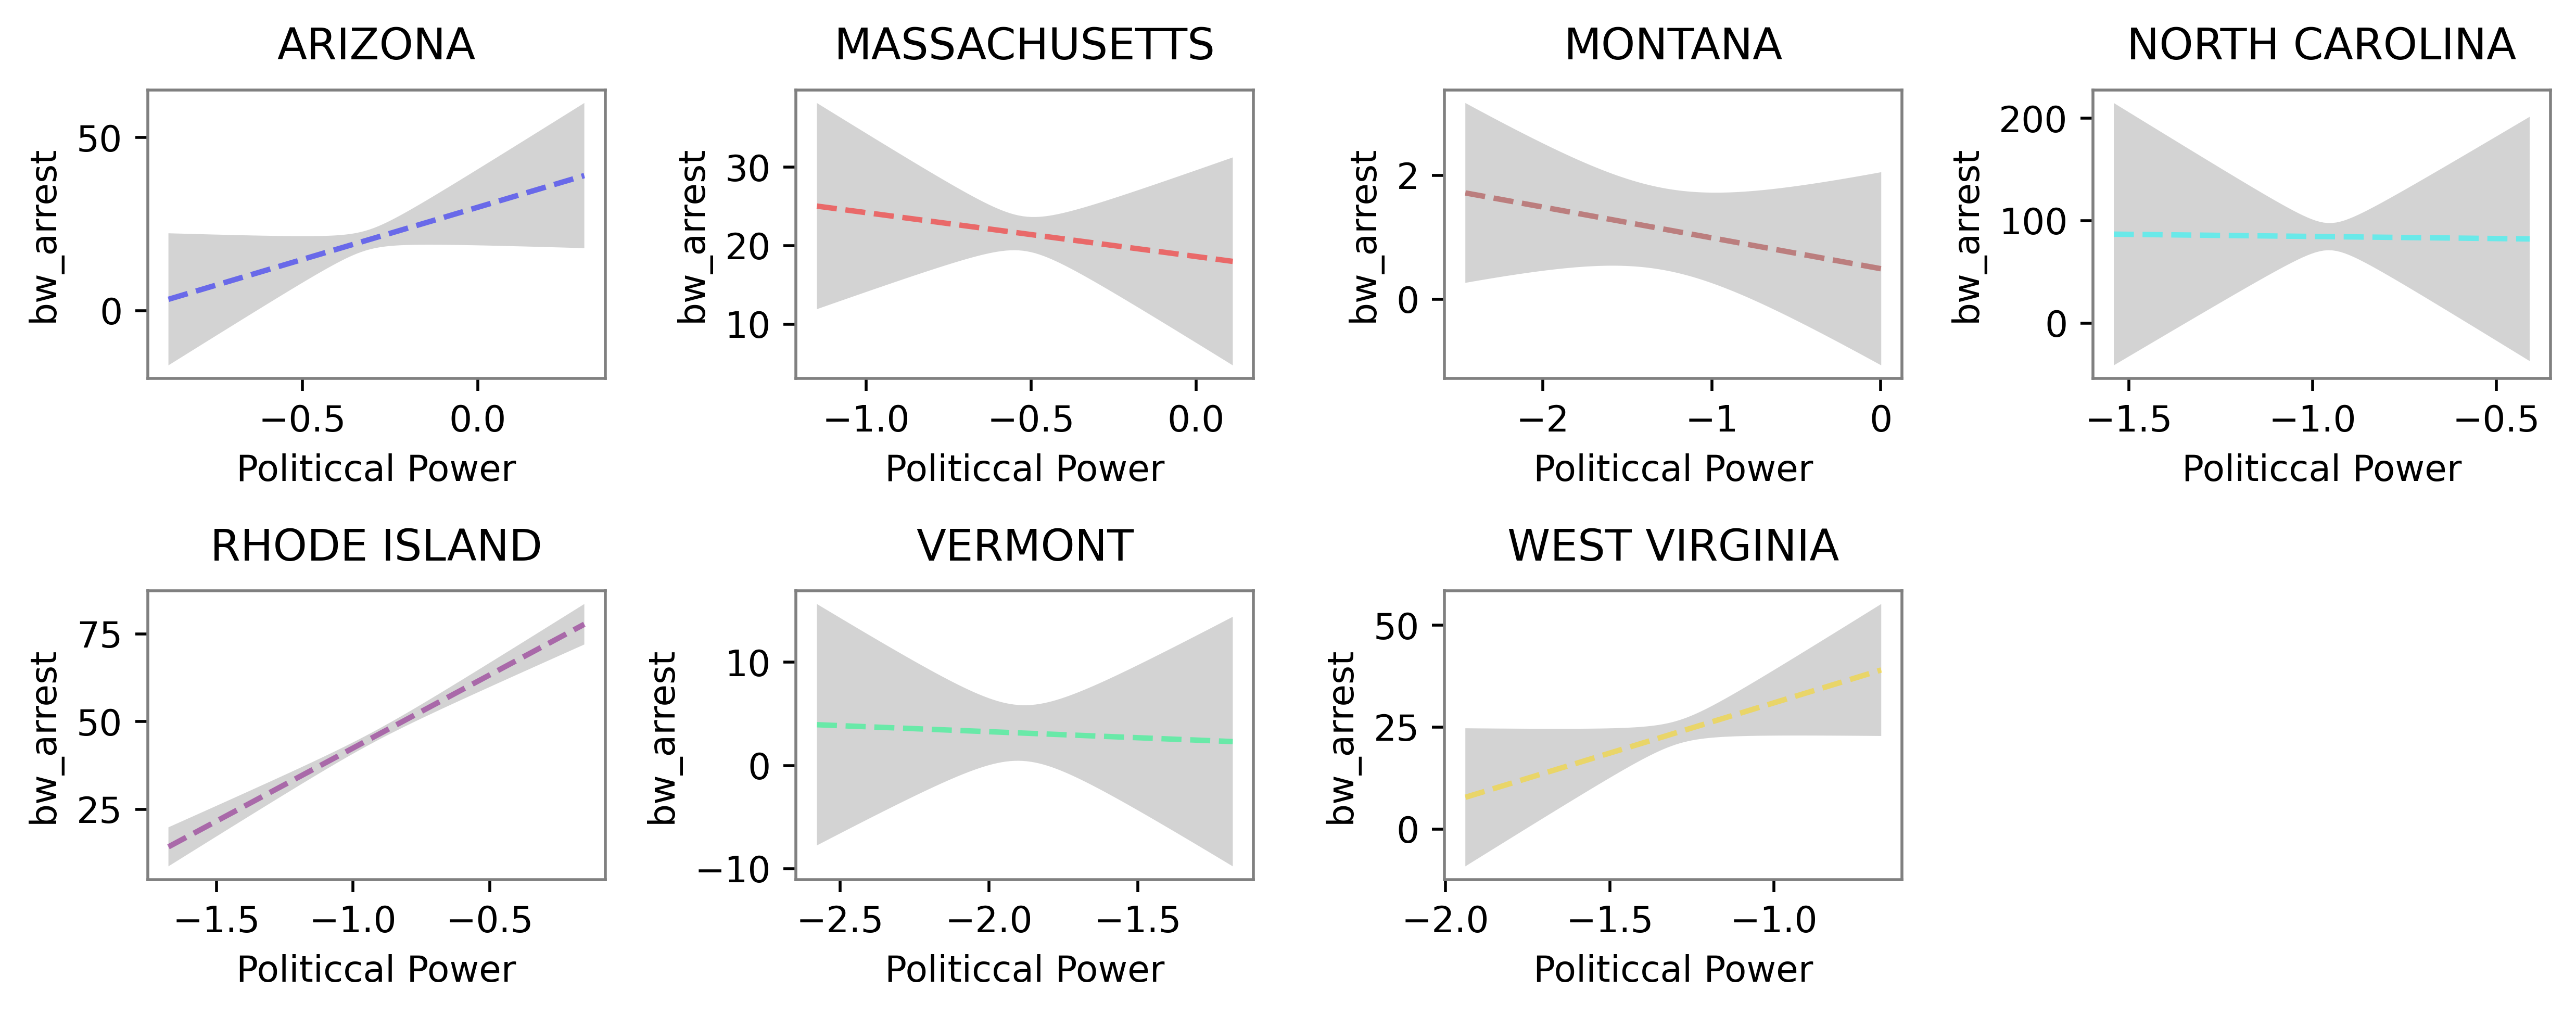

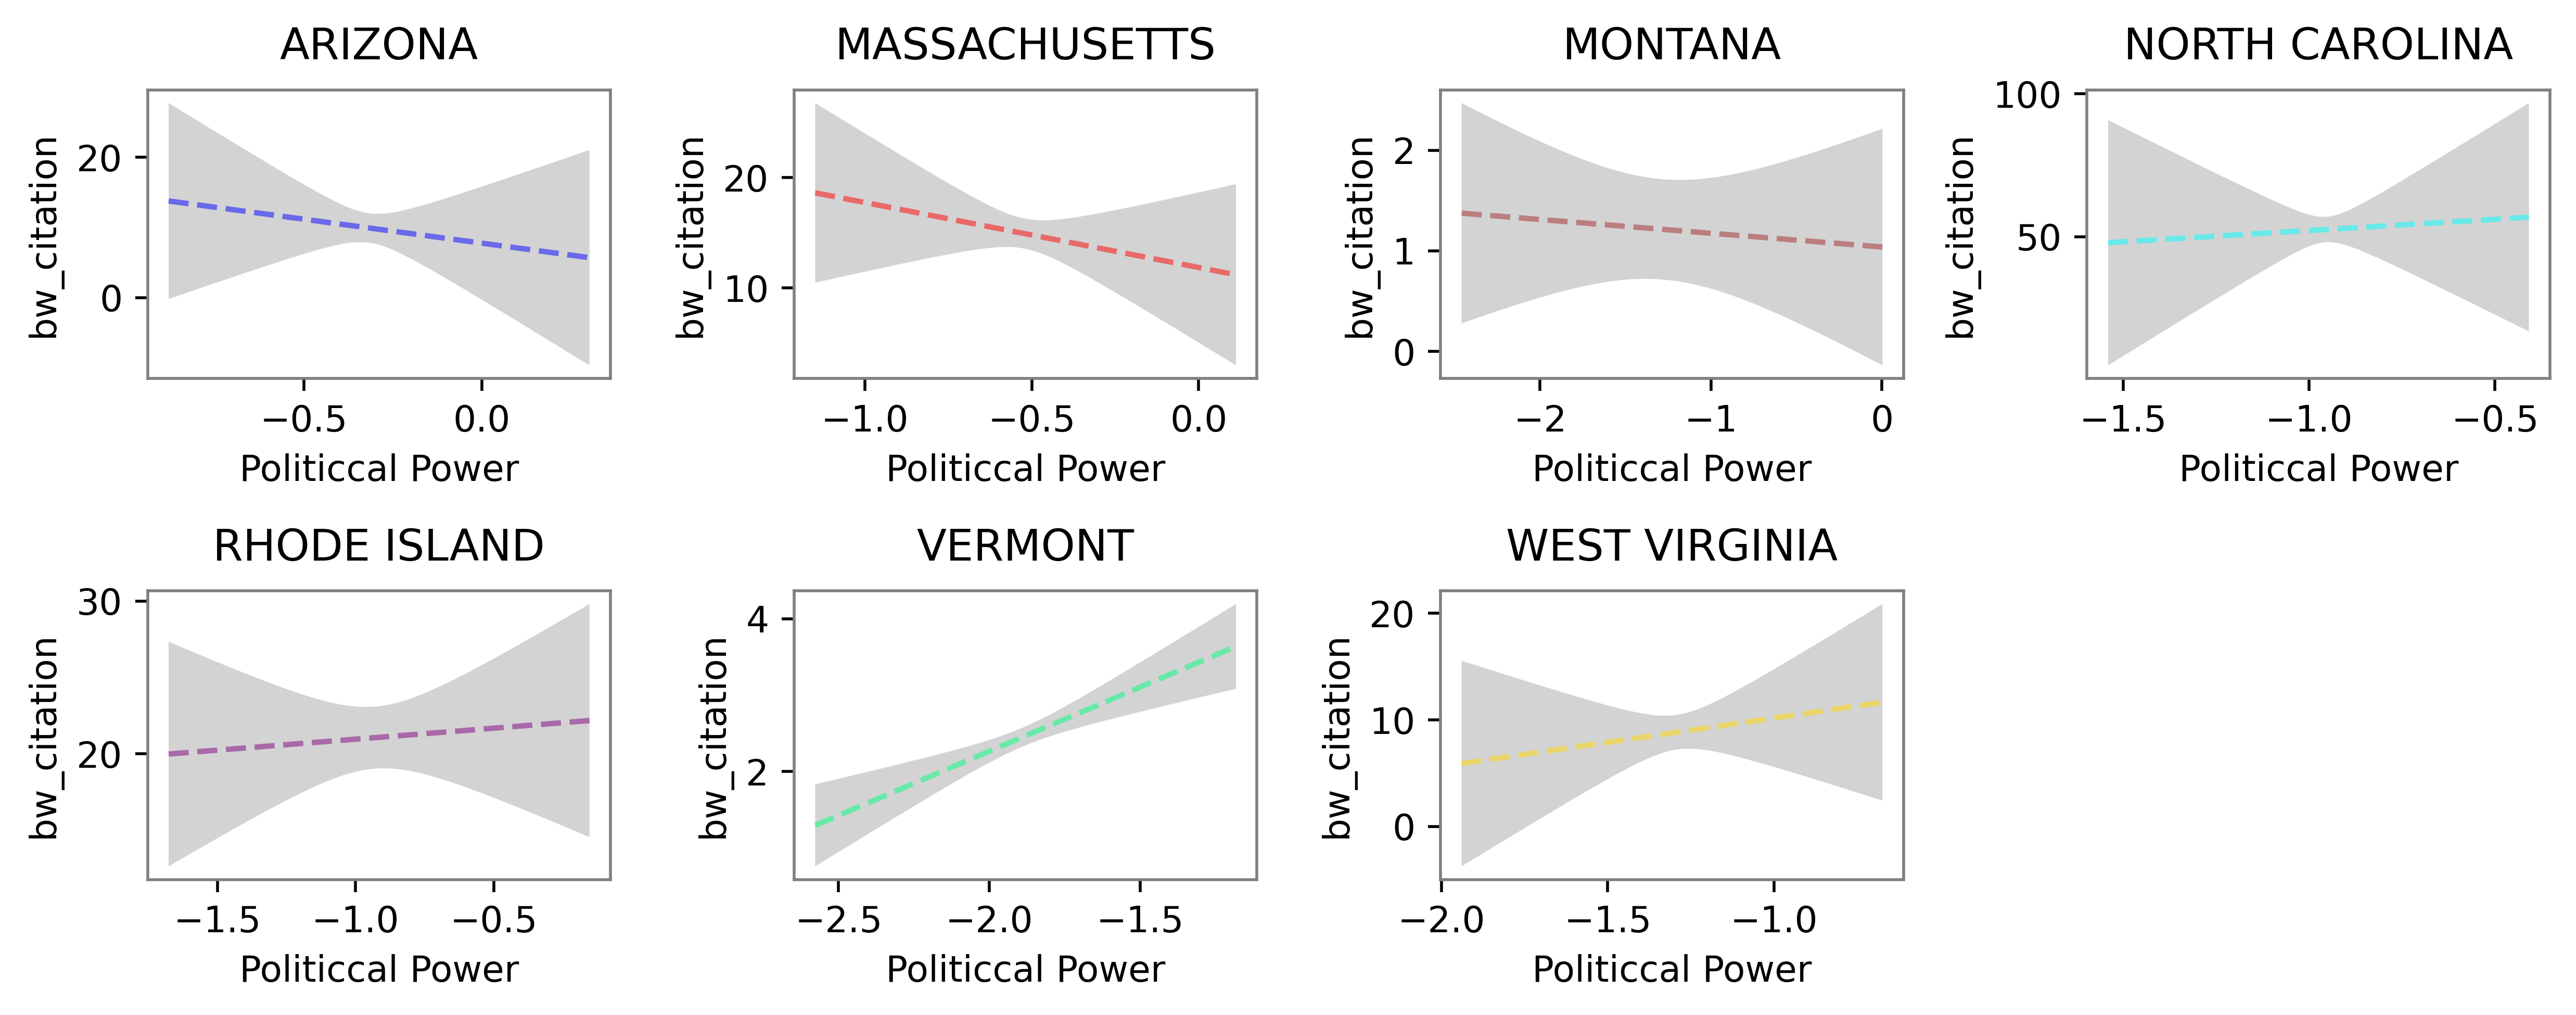

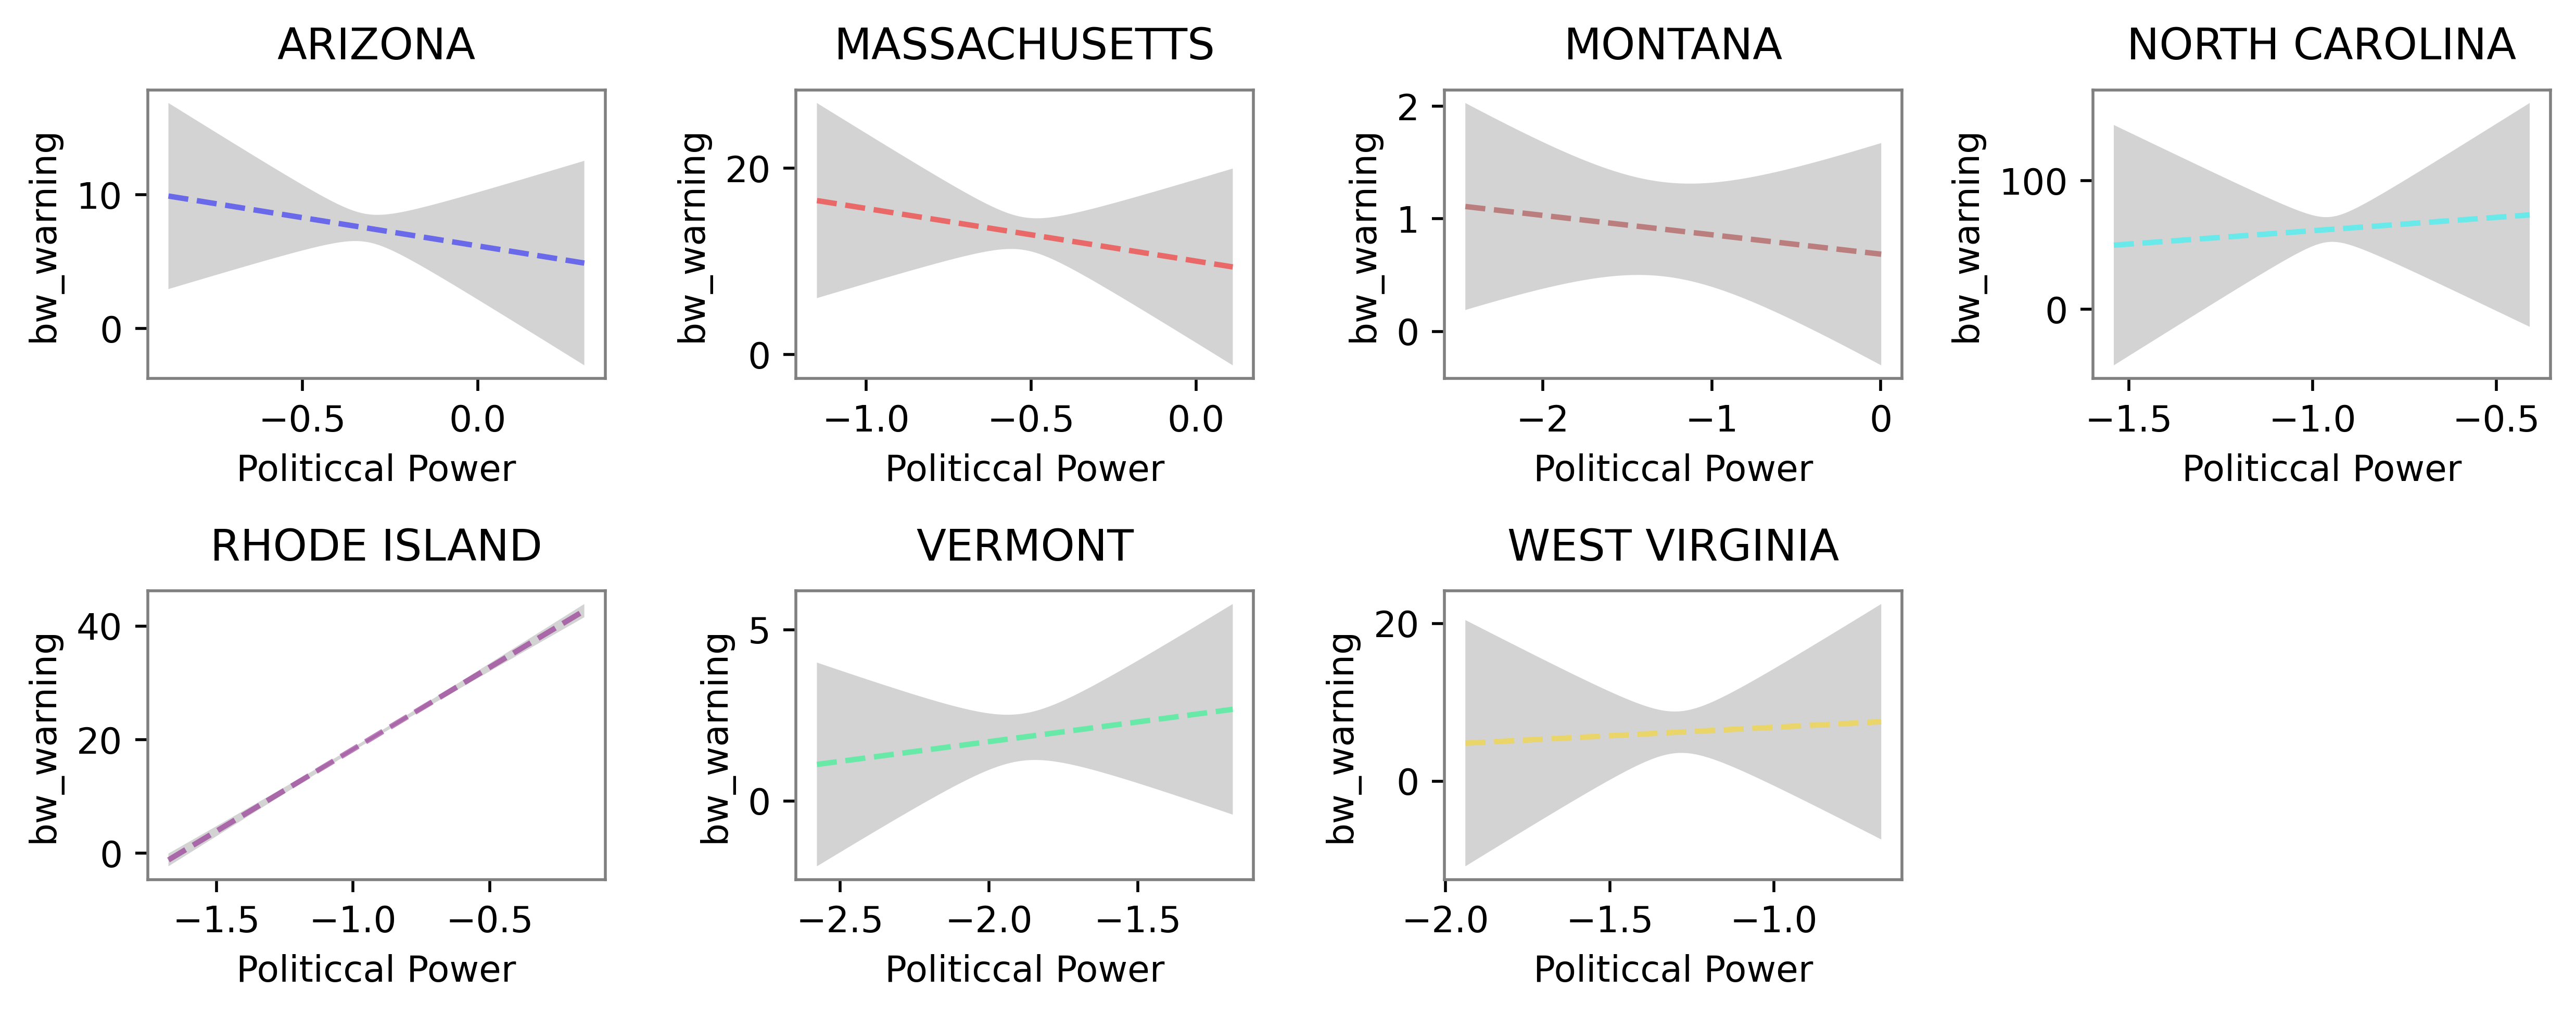

In [10]:
bw_ratio = pd.read_csv('data/bw_ratio_states.csv',encoding = 'utf-8',delimiter = ",") 
col2 = ['bw_search','bw_arrest','bw_citation','bw_warning']
mycolor = ['blue','red','brown','cyan','purple','springgreen','gold']
    
for m in range(len(col2)):
    plt.figure(figsize=(10,4), dpi=500)
    for n in range(len(statesname)):
        ax1 = plt.subplot(2,4,n+1)
        plot_ci_manual(b_pol_power['Political Power'][3*n:3*n+3],bw_ratio[col2[m]][3*n:3*n+3],
                       mycolor[n])
        # Figure modifications
        ax = plt.gca()
        # Borders
        ax.spines["top"].set_color("0.5")
        ax.spines["bottom"].set_color("0.5")
        ax.spines["left"].set_color("0.5")
        ax.spines["right"].set_color("0.5")
        # Labels
        ax.get_xaxis().set_tick_params(direction="out")
        ax.get_yaxis().set_tick_params(direction="out")
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left() 
        plt.xlabel("Politiccal Power")         # Sets the X-axis label and its size
        plt.ylabel(col2[m])                    # Sets the Y-axis label and its size
        # Title
        title = plt.gca().set_title(statesname[n], position=(.5, 1), color='black',
             verticalalignment="bottom", horizontalalignment="center")
    # Save Figure
    plt.tight_layout()
    plt.savefig("resultfigure"+col2[m]+".png", bbox_inches="tight")

plt.show()